In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [11]:
house_df = pd.read_csv('kc_house_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
house_df = house_df.drop(['id','date','zipcode'],axis=1)


In [ ]:
import seaborn as sns
sns.pairplot(house_df,diag_kind='kde')

In [ ]:
# find the correlation between the independent variable(prices) to the other variables
cor = house_df.corr()
cor_target = abs(cor["price"])

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features 

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
view             0.397293
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
lat              0.307003
sqft_living15    0.585379
Name: price, dtype: float64

In [0]:
X =  house_df[["bathrooms","bathrooms","sqft_living","view","grade","sqft_above","sqft_basement","lat","sqft_living15"]]
y =  house_df[["price"]]
y= y.rename(columns={'price':'Class'})
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=1)


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=model.predict(Xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

Class    240237.279554
dtype: float64

In [0]:
model.score(Xtest,ytest)

0.6302054717177539

In [0]:
#2. Considering all the features
X =  house_df.drop(["price"],axis=1)
y['Class'] =  house_df[["price"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=1)
model.fit(Xtrain,ytrain)
y_pred=model.predict(Xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

Class    221403.134928
dtype: float64

In [0]:
model.score(Xtest,ytest)

0.6859149897927521

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
#3. decisiontree classifier Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict=dt_model.predict(Xtest)

In [0]:
cr=metrics.classification_report(ytest,y_predict)
print(cr)

              precision    recall  f1-score   support

     80000.0       0.00      0.00      0.00         0
     82000.0       0.00      0.00      0.00         0
     82500.0       0.00      0.00      0.00         1
     83000.0       0.00      0.00      0.00         1
     84000.0       0.00      0.00      0.00         0
     85000.0       0.00      0.00      0.00         0
     86500.0       0.00      0.00      0.00         1
     90000.0       0.00      0.00      0.00         1
     96500.0       0.00      0.00      0.00         1
     99000.0       0.00      0.00      0.00         0
    100000.0       0.00      0.00      0.00         1
    104950.0       0.00      0.00      0.00         1
    105000.0       0.00      0.00      0.00         1
    107000.0       0.00      0.00      0.00         1
    109500.0       0.00      0.00      0.00         1
    110000.0       0.00      0.00      0.00         2
    114000.0       0.00      0.00      0.00         1
    115000.0       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [0]:
X_std.shape

(21613, 17)

In [0]:
cov_matrix = np.cov(X_std.T)

In [0]:
cov_matrix.shape

(17, 17)

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


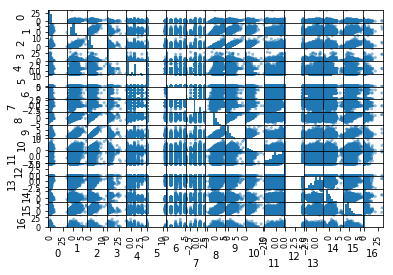

In [0]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [0]:
eig_vals.shape

(17,)

In [0]:
eig_vecs.shape

(17, 17)

In [0]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)


Eigen Vectors 
%s [[ 2.51152224e-01  1.70720869e-01 -7.60214651e-02  3.36960591e-01
   5.49985541e-02 -2.54565262e-01 -1.24900516e-02 -1.42908947e-01
   4.88161954e-01 -4.36779017e-01 -3.73137047e-01 -2.48764487e-01
  -6.80166656e-02  7.84443278e-02 -7.30667758e-02  2.31811128e-01
  -7.61255088e-17]
 [ 3.71462288e-01  4.00069772e-02 -1.17690922e-01  6.32251618e-02
   4.87207066e-03 -8.04501283e-02 -9.82111321e-02 -1.69148597e-01
   1.49021780e-01  3.00227283e-01 -1.42955067e-02 -2.39055527e-02
  -4.76557757e-01 -4.17719170e-01  1.27583249e-01 -5.16546383e-01
   7.81443032e-17]
 [ 4.03837539e-01  1.83858774e-01 -5.07981867e-03  1.10398056e-01
  -2.13791525e-02 -3.11828431e-02 -4.99671224e-04  5.43879935e-03
  -5.90716751e-02 -7.12251561e-02  1.47411516e-01  2.19985637e-01
   3.90360546e-01  1.43738576e-01  6.87119023e-02 -2.09817894e-01
   6.99260367e-01]
 [ 1.01760726e-01 -5.81309142e-02  6.28494392e-01 -2.21812927e-02
  -1.89437816e-01  8.25969106e-02 -6.63683917e-02 -2.23718861e-01
 

In [0]:

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.11014739  42.22382775  52.82357462  60.48214931  66.90151089
  72.63914524  77.60902194  82.17797508  86.03661072  89.51879544
  92.45186061  94.3727342   96.05126007  97.54836749  98.87806224
 100.         100.        ]


In [0]:
eigenvalues = eig_vals
eigenvectors = eig_vecs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  #


[(5.118961902850296, array([ 0.25115222,  0.37146229,  0.40383754,  0.10176073,  0.24318502,
        0.05054262,  0.12265596, -0.08863443,  0.37578415,  0.39838831,
        0.09263774,  0.24793946,  0.00606021,  0.00823513,  0.17235741,
        0.35975196,  0.10811328])), (2.0594209475529657, array([ 0.17072087,  0.04000698,  0.18385877, -0.05813091, -0.2720177 ,
        0.23402192,  0.36809809,  0.3086895 ,  0.03466808, -0.06557708,
        0.50424716, -0.39072491,  0.19034857,  0.15827646, -0.29759353,
        0.08096368, -0.06075232])), (1.8020403453547578, array([-0.07602147, -0.11769092, -0.00507982,  0.62849439, -0.23216401,
        0.05508961,  0.07514957,  0.12360475, -0.08664639, -0.0170217 ,
        0.02130712, -0.0959113 ,  0.00761593, -0.18444402,  0.23240465,
        0.02894162,  0.63332499])), (1.3020179399886633, array([ 0.33696059,  0.06322516,  0.11039806, -0.02218129, -0.22788867,
       -0.59380325, -0.44575023,  0.31598439, -0.04471841, -0.01386753,
        0.255047

In [0]:
tot = sum(eig_vals)
var_explained = [(i / tot) for i in sorted(eig_vals, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100
cum_var_exp

array([0.30110147, 0.42223828, 0.52823575, 0.60482149, 0.66901511,
       0.72639145, 0.77609022, 0.82177975, 0.86036611, 0.89518795,
       0.92451861, 0.94372734, 0.9605126 , 0.97548367, 0.98878062,
       1.        , 1.        ])

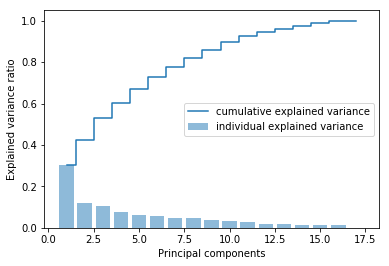

In [0]:

import matplotlib.pyplot as plt 
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=1)
xtrain

In [0]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy' )
dt_model2.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict2=dt_model2.predict(xtest)

In [0]:
acc2=metrics.accuracy_score(ytest,y_predict2)
acc2

0.009099321406539173

In [0]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A c

KeyboardInterrupt: ignored

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, Proj_data_df, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default 

LR: 0.009392 (0.002518)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when

KNN: 0.003887 (0.001018)
CART: 0.004072 (0.001148)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [0]:

LR=LogisticRegression()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, decomposition

In [46]:
#Declare data preprocessing steps
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', LR)])

pca.fit(X) 


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
n_components = [8,10,12]
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components))
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
estimator.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
estimator.best_params_

In [0]:
estimator.best_score_